## Learning Neural Interactions 

Dataset sources: 
1. pvc-3(http://crcns.org/data-sets/vc/pvc-3)
2. https://github.com/ifiaposto/Mutually-Regressive-Point-Processes
3. https://github.com/ifiaposto/Poisson-GLMs-for-Neural-Spike-Train-Analysis

In [58]:
import csv
import numpy as np

### Reading CSV file

In [59]:
with open('./data/multineuron_spike_train_4000.csv', 'r') as f:
    data = csv.reader(f, delimiter=',') 
    lines = [line for line in data]
    header = lines[0]
    lines = lines[1:]

In [12]:
header, len(lines)

(['arrival time',
  ' event type',
  ' event id',
  ' label',
  ' parent arrival time',
  ' nof offsprings',
  ' offsprings <type>',
  'offsprings <id>'],
 3978)

In [106]:
nodes = sorted(set([int(line[1]) for line in lines]))
spike_trains = []

for node in sorted(nodes):
    node_spikes = []
    for line in lines:
        if line[1] == str(node):
            node_spikes.append(float(line[0]))
    
    
    spike_trains.append(np.array(node_spikes))

In [107]:
## Sanity check 
len(spike_trains) ==  len(nodes), len(nodes)

(True, 25)

## Learning 

In [65]:

from tick.hawkes import HawkesConditionalLaw
from tick.plot import plot_hawkes_kernel_norms


## Initialize model 
hawkes_learner = HawkesConditionalLaw(
    claw_method="log", delta_lag=0.1, min_lag=5e-4, max_lag=500,
    quad_method="log", n_quad=10, min_support=1e-4, max_support=1, n_threads=4)

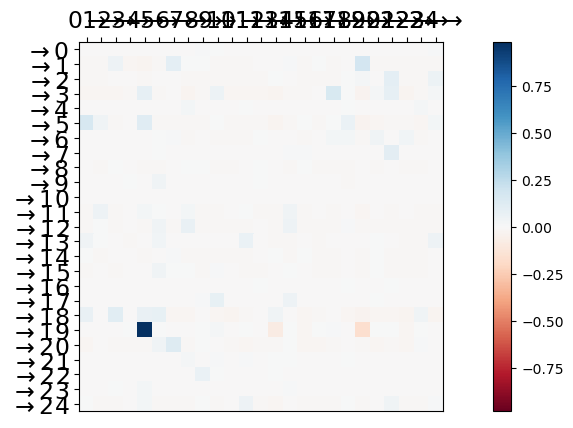

In [66]:
hawkes_learner.fit(spike_trains)
adjacency_plot = plot_hawkes_kernel_norms(hawkes_learner,
                         node_names=[str(n) for n in nodes])

## The Visual Cortex Dataset 

* Dataset link: http://crcns.org/data-sets/vc/pvc-3
* Preprocessed Dataset: https://github.com/ifiaposto/Poisson-GLMs-for-Neural-Spike-Train-Analysis/tree/master/data 

In [111]:
import glob 

spike_trains_2 = []

for i in range(25):
    with open('./data/pvc3/neuron_{}.csv'.format(i+1), 'r') as f:
        spike_trains_2.append(np.array(list(map(lambda l: float(l)/1000, f.readlines())), dtype='float'))

In [113]:
hawkes_learner_2 = HawkesConditionalLaw(
    claw_method="log", delta_lag=0.1, min_lag=5e-4, max_lag=500,
    quad_method="log", n_quad=10, min_support=1e-4, max_support=1, n_threads=4)

hawkes_learner_2.fit(spike_trains_2)

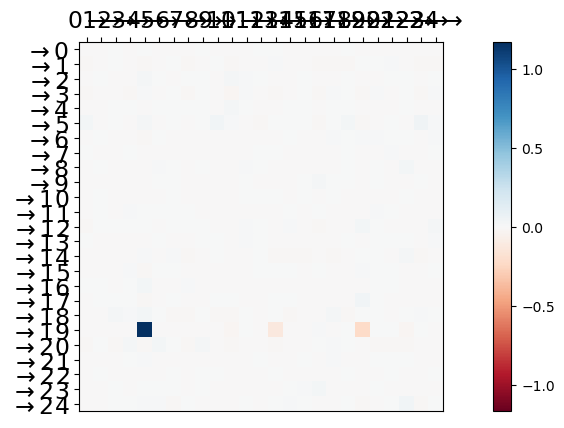

In [114]:
adjacency_plot = plot_hawkes_kernel_norms(hawkes_learner_2,
                         node_names=[str(n) for n in nodes])